# Movie Review Sentiment Analysis Using LSTM

## Introduction

This project focuses on building a Recurrent Neural Network (RNN) using Long Short-Term Memory (LSTM) units to analyze movie reviews and determine the sentiment expressed in the text. Sentiment analysis is a natural language processing task that classifies text based on the emotional tone, which can be broadly categorized as positive or negative.

The dataset consists of movie reviews and their corresponding sentiment labels:
- **Review**: The text of the movie review.
- **Sentiment**: The label indicating whether the review is positive (1) or negative (0).

By leveraging LSTM layers, which are designed to capture dependencies and patterns over time, the model can effectively analyze the sequential nature of the review text and predict the associated sentiment.

### Objectives:
- Build and train an LSTM-based model to classify movie reviews as positive or negative.
- Preprocess the text data, including tokenization and padding.
- Evaluate the model’s performance using metrics like accuracy and loss.

This project showcases the application of LSTMs in sentiment analysis, providing a robust method for understanding and classifying textual data based on the sentiment expressed.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('movie_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49969 entries, 0 to 49968
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49969 non-null  object
 1   sentiment  49969 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 780.9+ KB


In [4]:
df.describe()

,sentiment
count,49969.000000
mean,0.499950
std,0.500005
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [5]:
df.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


In [6]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df.duplicated().sum()

418

In [8]:
df.drop_duplicates(inplace= True, keep = 'first')

In [9]:
label_counts = df['sentiment'].value_counts()

In [10]:
print(label_counts)

sentiment
1    24866
0    24685
Name: count, dtype: int64


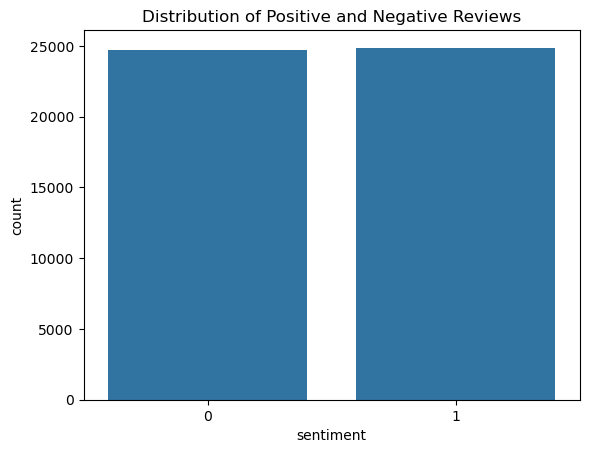

In [11]:
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Positive and Negative Reviews')
plt.show()

In [12]:
df_sample = df.sample(n=10000, random_state=42)

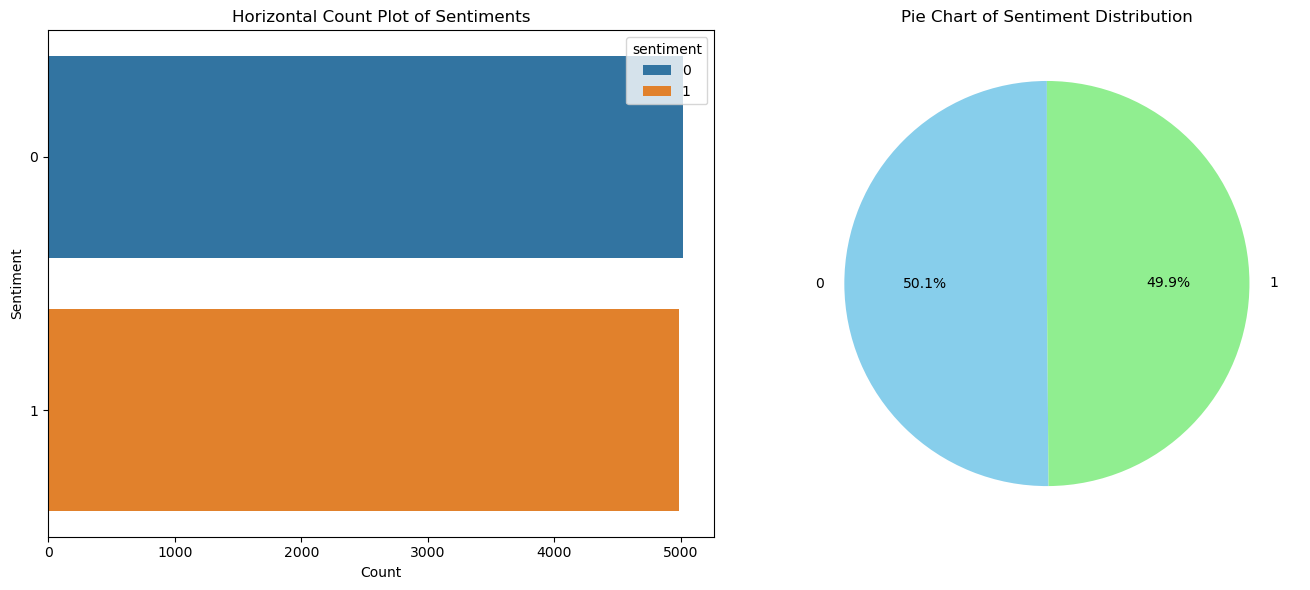

In [13]:
label_counts = df_sample['sentiment'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.countplot(y='sentiment', data=df_sample, ax=axes[0],hue='sentiment') 
axes[0].set_title('Horizontal Count Plot of Sentiments')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Sentiment')


axes[1].pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
axes[1].set_title('Pie Chart of Sentiment Distribution')

plt.tight_layout()
plt.show()

In [14]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [15]:
def preprocess(sentence):
    #removes all the special characters and split the sentence at spaces
    text = re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    
    # converts words to lowercase and removes any stopwords
    words = [x.lower() for x in text if x not in stopwords.words('english')]
    
    # Lemmatize the words
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words ]
    
    # convert the list of words back into a sentence
    word = ' '.join(word)
    return word

In [17]:
df_sample['review'] = df_sample['review'].apply(preprocess)

In [18]:
df_sample['review'].head()

11824    although stardust seem fantasy film predictabl...
9296     like lot people i love original american graff...
31513    this movie amaze tribute whoever go type pain ...
45260    i saw movie thursdays night really bore day i ...
21627    this pretty good movie i love fighter jet movi...
Name: review, dtype: object

In [19]:
X=df_sample['review']

In [20]:
y=df_sample['sentiment']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [21]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences 

In [25]:
tokenizer = Tokenizer(num_words=5000)

In [26]:
tokenizer.fit_on_texts(X_train)

In [27]:
vocab_size = len(tokenizer.word_index) + 1

In [28]:
def text_encoding(txt):
    # texts_to_sequences Transforms each text in texts to a sequence of integers.
    encoded_docs = tokenizer.texts_to_sequences(txt)
    
    # pad_sequences is used to ensure that all sequences in a list have the same length.
    padded_sequence = pad_sequences(encoded_docs, maxlen=128)    
       
    return padded_sequence

In [29]:
X_train = text_encoding(X_train)
X_test = text_encoding(X_test)

In [30]:
from keras import Sequential
from keras import layers

In [31]:
model = Sequential()
### Embedding layer
model.add(layers.Embedding(vocab_size, 128))

### Lstm layer
### return_sequences: Whether to return the last output in the output sequence, or the full sequence.
model.add(layers.LSTM(128,  return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(128))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1, activation='sigmoid'))

2024-10-20 17:21:35.421632: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-10-20 17:21:35.421674: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-10-20 17:21:35.421694: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-10-20 17:21:35.422616: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-20 17:21:35.422918: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         5123456   
                                                                 
 lstm (LSTM)                 (None, None, 128)         131584    
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [33]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [34]:
X_train.shape

(8000, 128)

In [35]:
y_train.shape

(8000,)

In [36]:
model.fit(X_train, y_train, epochs=10, validation_split = 0.2)

Epoch 1/10


2024-10-20 17:22:26.979221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-20 17:22:27.140900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-20 17:22:27.215125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-20 17:22:27.357815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  3/200 [..............................] - ETA: 7s - loss: 0.6936 - accuracy: 0.5312  

2024-10-20 17:22:27.456901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


199/200 [============================>.] - ETA: 0s - loss: 0.5069 - accuracy: 0.7522

2024-10-20 17:22:33.713640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-20 17:22:33.768899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-20 17:22:33.805002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 8s 35ms/step - loss: 0.5069 - accuracy: 0.7522 - val_loss: 0.3939 - val_accuracy: 0.8338
Epoch 2/10
200/200 [==============================] - 6s 31ms/step - loss: 0.2652 - accuracy: 0.8958 - val_loss: 0.3645 - val_accuracy: 0.8413
Epoch 3/10
200/200 [==============================] - 6s 30ms/step - loss: 0.1722 - accuracy: 0.9377 - val_loss: 0.4661 - val_accuracy: 0.8344
Epoch 4/10
200/200 [==============================] - 6s 30ms/step - loss: 0.1212 - accuracy: 0.9580 - val_loss: 0.4847 - val_accuracy: 0.8213
Epoch 5/10
200/200 [==============================] - 6s 30ms/step - loss: 0.1025 - accuracy: 0.9653 - val_loss: 0.7082 - val_accuracy: 0.8075
Epoch 6/10
200/200 [==============================] - 6s 30ms/step - loss: 0.0763 - accuracy: 0.9750 - val_loss: 0.8541 - val_accuracy: 0.8031
Epoch 7/10
200/200 [==============================] - 6s 30ms/step - loss: 0.0585 - accuracy: 0.9802 - val_loss: 0.7018 - val_accuracy: 0.8031
Epoch 8/10

In [37]:
y_pred = model.predict(X_test)

 1/63 [..............................] - ETA: 21s

2024-10-20 17:23:58.589227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-20 17:23:58.641640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-20 17:23:58.702221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 1s 13ms/step


In [40]:
y_pred1 = (y_pred >= 0.5).astype(int)


In [43]:
y_test

26009    1
8850     1
21196    0
49539    0
16970    0
        ..
44362    0
41687    1
43714    1
47770    0
43028    1
Name: sentiment, Length: 2000, dtype: int64

In [41]:
y_pred1

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [44]:
accuracy_score(y_test, y_pred1)

0.8305

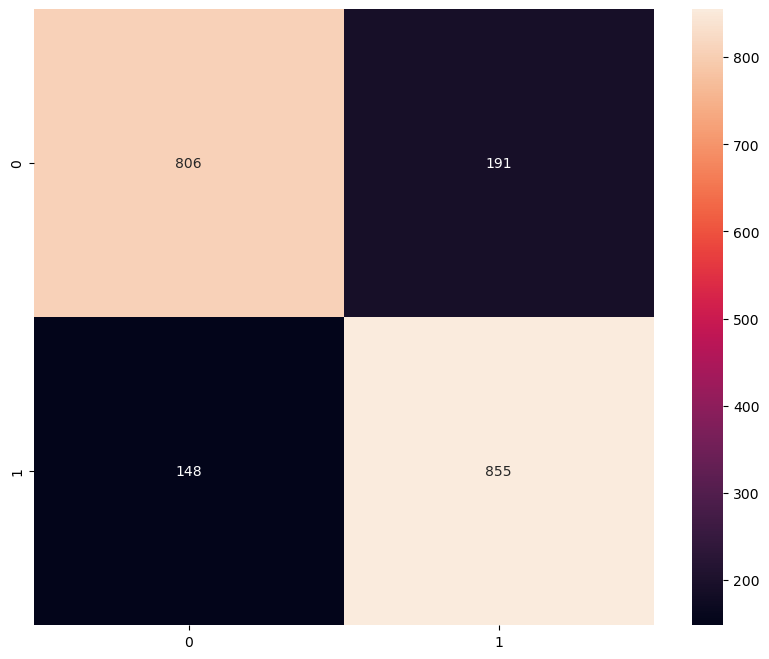

In [45]:
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix(y_test, y_pred1), annot = True, fmt = 'd')
plt.show()

In [46]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       997
           1       0.82      0.85      0.83      1003

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



<div align="center">
  <style>
    .wiggly-line {
      width: 100%;
      height: 5px;
      background: linear-gradient(270deg, #ff0000, #ff7300, #ffec00, #00ff00, #00ffe8, #0070ff, #6b00ff, #ff00f4, #ff0000);
      background-size: 400% 100%;
      animation: glitter 1.5s linear infinite;
    }

    @keyframes glitter {
      0% { background-position: 0% 50%; }
      50% { background-position: 100% 50%; }
      100% { background-position: 0% 50%; }
    }
  </style>
  
  <div class="wiggly-line"></div>
  
  <p style="font-size: 1.5em; font-weight: bold; color: #ff00ff;">✨ Thank You for Exploring the Project! ✨</p>
  
  <div class="wiggly-line"></div>
</div>